# **Module 7 Project: Machine Learning**
## **Author:** k363m611 Dobler
## **Date:** 10/8/2024
[GitHub Repository](https://github.com/k363m611dobler98/datafun-07-ml)

In [448]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## **Part 1:** Chart a Straight Line

In [449]:
# Create a lambda to calculate Celsius equivalents of Farenheit temperatures 

c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

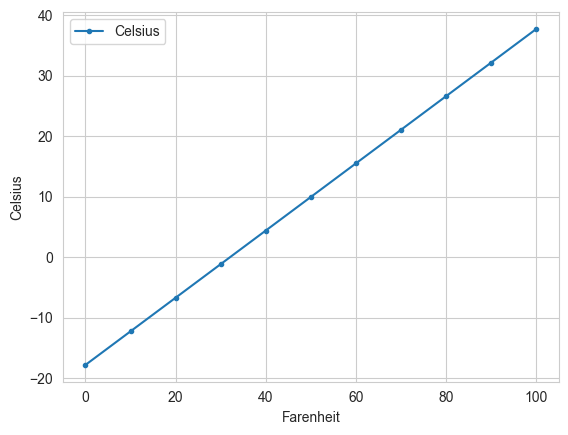

In [450]:
# Create a DataFrame using the Pandas library
# Display Farenheit and Celsius temperatures using the plot method

temps_df = pd.DataFrame(temps, columns=['Farenheit', 'Celsius'])
axes = temps_df.plot(x='Farenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## **Part 2:** Prediction

### Section 1: Data Acquisition

In [451]:
# Load data from .csv file into the DataFrame

nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2: Data Inspection

In [452]:
# Inspect the head and tail 

nyc.head()
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3: Data Cleaning

In [453]:
# Rename "Value" column as "Temperature"

nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [454]:
# Check the "Date" column data type

nyc.Date.dtype 

dtype('int64')

In [455]:
# Truncate the last two digits by dividing by 100

nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4: Descriptive Statistics

In [456]:
# Get basic descriptive statistics by calling describe on the Temperature column

pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5: Build the Model

In [457]:
# Use stats from "SciPy" library
# Use the "stats" module to provide the "linregress" function

linear_regression = stats.linregress(x=nyc.Date,
                                     y=nyc.Temperature)
linear_regression.slope

np.float64(0.014771361132966163)

In [458]:
# Calculate the intercept

linear_regression.intercept

np.float64(8.694993233674289)

### Section 6: Predict 

In [459]:
# Predict the average January temperature in 2024

linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

In [460]:
# Predict the average temperature of 1890 (5 years prior to data records)

linear_regression.slope * 1890 + linear_regression.intercept

np.float64(36.612865774980335)

### Section 7: Visualizations 

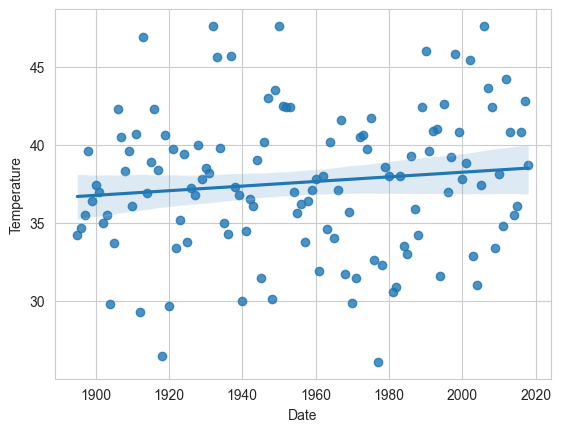

In [461]:
# Plot the average high temperatures with a regression line

sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

(10.0, 70.0)

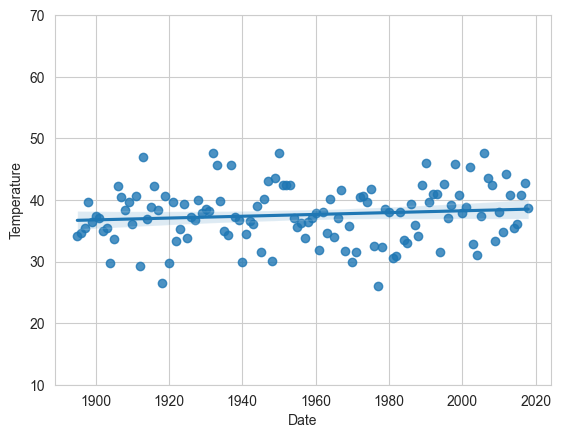

In [462]:
# Scale the y-axis for a better visual interpretation 

sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

## **Part 3:** Prediction

### Section 1: Build the Model

In [463]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1), nyc.Temperature.values,
    random_state=11)

In [464]:
# Check the shape of the model

X_train.shape

(93, 1)

In [465]:
# Check the shape of the model

X_test.shape

(31, 1)

In [466]:
# Train the Model

# Assuming X_train and y_train are already defined
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

# Print the LinearRegression object
print(linear_regression)

# Optionally print specific attributes
print("Coefficients:", linear_regression.coef_)
print("Intercept:", linear_regression.intercept_)

LinearRegression()
Coefficients: [0.01939167]
Intercept: -0.30779820252658396


### Section 2: Test the Model

In [467]:
linear_regression.coef_

array([0.01939167])

In [468]:
linear_regression.intercept_

np.float64(-0.30779820252658396)

In [469]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3: Predict

In [470]:
# Predict the temperature for January 2024

predict = (lambda x: linear_regression.coef_ * x +
           linear_regression.intercept_)
predict(2024)

array([38.94094855])

In [471]:
# Predict January temperature for 1890

predict(1890)

array([36.34246432])

In [472]:
# Predict for 2080

predict(2080)

array([40.02688225])

### Section 4: Visualizations

(10.0, 70.0)

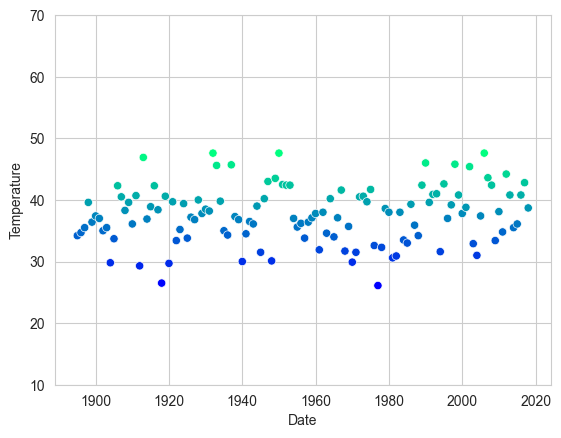

In [473]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
                       hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)

In [474]:
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

In [475]:
y = predict(x)

(10.0, 70.0)

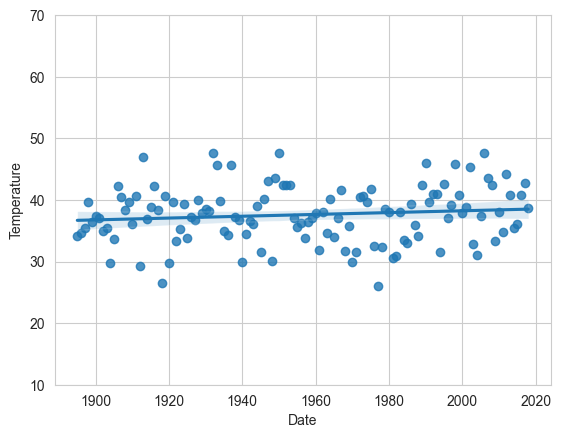

In [476]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

## **Part 4:** Insights

There are two methods that we used to predict the average high temperature in January for New York City:
* SciPy linregress method
* scikit-learn Linear Regression model

There are pros and cons to both methods and we will dive into those here. 

Starting with **SciPy linregress**, it is easy on the user to be able to calculate linear regression lines, while outputting the slope, intercept, and correlation coefficient. It is able to take smaller datasets and return results extremely quick. However, it is not the best option for complex datasets and models. It lacks sophisticated metrics that can deliver more high-level insights.

The **Scikit-learn Linear Regression** method is a bit more complex than the previous method. It takes a fair amount of machine learning background and understanding to fully use its capabilities. If you do have a good amount of machine learning knowledge, this method will allow you to dig deep into analytics and trends in your data, producing high level insights. 

### Conclusion
Both methods can be used when looking for insights within your data and they both produced similar predictions as well. For less complex data, linregress will be sufficient for your projects, but if you have more data that is complex, the Scikit-learn Linear Regression route may be best for you. 